In [259]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

In [275]:
import sys
sys.path 

['',
 '/Users/seemann/.pyenv/versions/3.5.3/lib/python35.zip',
 '/Users/seemann/.pyenv/versions/3.5.3/lib/python3.5',
 '/Users/seemann/.pyenv/versions/3.5.3/lib/python3.5/plat-darwin',
 '/Users/seemann/.pyenv/versions/3.5.3/lib/python3.5/lib-dynload',
 '/Users/seemann/.pyenv/versions/3.5.3/lib/python3.5/site-packages',
 '/Users/seemann/.pyenv/versions/3.5.3/lib/python3.5/site-packages/IPython/extensions',
 '/Users/seemann/.ipython']

In [261]:
df = quandl.get('WIKI/GOOGL')
# df = quandl.get('WIKI/GM')

In [262]:
print(df.head())
# print()
print(df.tail())

# df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
# print(df.head())


              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [263]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [264]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [265]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
# forecast_out = 5

In [266]:
df['label'] = df[forecast_col].shift(-forecast_out)

print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.072956    0.324968   44659000.0  69.399229
2004-08-20   54.322689  7.921706    7.227007   22834300.0  68.752232
2004-08-23   54.869377  4.049360   -1.227880   18256100.0  69.639972
2004-08-24   52.597363  7.657099   -5.726357   15247300.0  69.078238
2004-08-25   53.164113  3.886792    1.183658    9188600.0  67.839414


In [267]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

In [268]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [269]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    accuracySRV = clf.score(X_test, y_test)
    print(k,accuracySRV)

linear 0.971946432475
poly 0.729829418192
rbf 0.817405130773
sigmoid 0.888919722667


In [270]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

accuracyLR = clf.score(X_test, y_test)
accuracyLR

0.97208416512129581

In [271]:
forecast_set = clf.predict(X_lately)
print(df.dropna().tail())
print(forecast_set, accuracyLR, forecast_out)

            Adj. Close    HL_PCT  PCT_change  Adj. Volume   label
Date                                                             
2017-03-10     861.405  0.768396   -0.150110    1336585.0  889.14
2017-03-13     864.580  0.729834    0.435626    1166605.0  891.44
2017-03-14     865.910  0.860367    0.250072    1061692.0  924.52
2017-03-15     868.390  0.988611    0.051847    1332885.0  932.82
2017-03-16     870.000  0.596552   -0.060882    1104452.0  937.09
[ 882.1059747   877.80187472  858.36649167  859.6435492   848.76173447
  844.29028199  847.65493817  850.13681799  859.59216095  859.66515543
  857.87600537  866.18916587  862.61026407  858.2498299   854.78829052
  852.02954865  851.83407731  849.77861022  851.5615189   850.30736395
  864.74922873  864.12879041  866.54538122  870.08591762  869.06280209
  888.2930542   898.09578113  898.93713588  901.15007039  933.02122621
  941.77142279  946.39343044] 0.972084165121 32


In [272]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [273]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

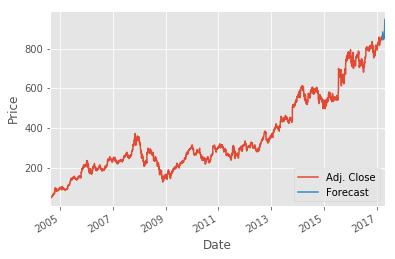

In [274]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()